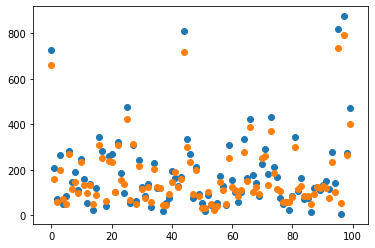

In [54]:
import numpy as np  # arrays and matrix math
import pandas as pd  # DataFrames
import matplotlib.pyplot as plt  # for plott
import math


#Calculating Estimated Ultimate Recovery

df = pd.read_csv("well production.csv")
listOfWells = []
for i in range(100):
    listOfWells.append(i)

#Here, a scatterplot is created, comparing the month 4 production to the month 5 production
#This is to show that a Decline rate D exists and can be calculated as the proportion decrease
#of oil produced per month
x = listOfWells
y = df["oil 4"]
plt.scatter(x, y)

z = listOfWells
u = df["oil 5"]
plt.scatter(z, u)
#the vertical difference between the blue dots and the orange dots represents the dropoff (Decline), after the 4th
#month for the wells

In [55]:
#To estimate the Decline Rate D, we can take the average oil produced for month 4 and month 5 and
#find the difference
D = (df["oil 4"].mean() - df["oil 5"].mean())/df["oil 4"].mean()
print(D)
#Hence, our decline proportion is 0.0817

0.08168398031711316


In [56]:
#Now we need to determine initial production by using our production data and dividing it by the OOIP
dfOil = pd.read_csv("calculations.csv")

df["proportions"] = df["Oil 1"]/dfOil["original oil in place"]
averageProportion = df["proportions"].mean()

FileNotFoundError: [Errno 2] File b'calculations.csv' does not exist: b'calculations.csv'

In [57]:
#This function calculates the initial production by using the average production of the
#production data compared to original oil in place to determine how many barrels of oil
#will be produced by the new wells over the first month, and we divide by 30
#to approximate the BOPD
def calculate_initial_production(OOIP):
    return (OOIP*averageProportion)/30


#we will estimate qec, the economic limit rate of production to be 40 BOPD
def calculate_life_of_reservoir(OOIP):
    initialRate = calculate_initial_production(OOIP)
    return (1/D)*np.log(initialRate/40)
    

In [58]:
#We can calculate the final rate of production by taking our end of life time and substituting that in 
#for our rate of production equation
def calculate_end_production(OOIP):
    initialRate = calculate_initial_production(OOIP)
    time = calculate_life_of_reservoir(OOIP)
    return initialRate*math.exp(-D*time)
    

In [59]:
#We calculate EUR byu using the cumulative production formula
def calculate_EUR(OOIP):
    initalRate = calculate_initial_production(OOIP)
    finalRate = calculate_end_production(OOIP)
    return (finalRate - initialRate)/D